# Soluciones numéricas de sistemas de ecuaciones diferenciales

https://danielmuellerkomorowska.com/2021/02/16/differential-equations-with-scipy-odeint-or-solve_ivp/

SciPy features two different interfaces to solve differential equations: odeint and solve_ivp. The newer one is solve_ivp and it is recommended but odeint is still widespread, probably because of its simplicity. Here I will go through the difference between both with a focus on moving to the more modern solve_ivp interface. The primary advantage is that solve_ivp offers several methods for solving differential equations whereas odeint is restricted to one. We get started by setting up our system of differential equations and some parameters of the simulation.

In [3]:
import math
import numpy as np
from scipy.integrate import odeint, ode, solve_ivp
import matplotlib.pyplot as plt

In [6]:
def dy(y, t, gamma, w0):
# def dy(t, y, gamma, w0):
    """
    El lado derecho de la ODE del movimiento amortiguado.
    """
    x, v = y #y[0], y[1]
    
    dx = v
    dv= -2 * gamma * v - w0**2 * x

    return [dx, dv]

## odeint

Es más simple. Los tiempos donde se calculan las soluciones se ingresan como un vector. Solo resuelve usando LSODA.

In [7]:
# Parámetros del sistema:
w0 = 2*math.pi*0.5
gamma = 0.1*w0

# Condiciones iniciales: 
y0 = [1.0, 6.0]

# Tiempos donde resolver la ODE.
t = np.linspace(0, 10, 1000)

y = odeint(dy, y0, t, args=(gamma, w0))

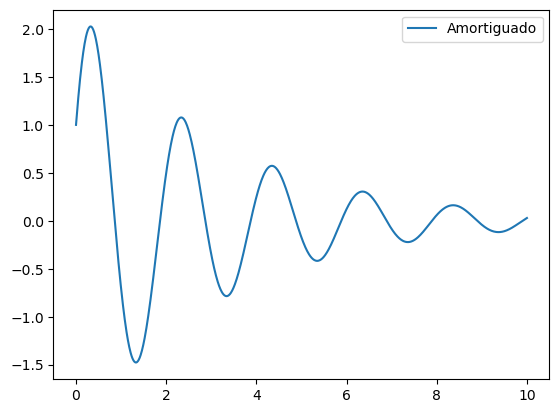

In [8]:
plt.plot(t, y[:,0], label="Amortiguado")
plt.legend();

## solve_ivp

Los tiempos se pueden informar como un vector, o se puede ingresar un t inicial y final y decide solo los intervalos. Hay que ajustar la tolerancia en el error de las soluciones también. Se puede seleccionar el algoritmo.

In [9]:
# Tuve que cambiar el orden de y y t, habría que corregir eso.
# def dy(y, t, gamma, w0):
def dy(t, y, gamma, w0):
    """
    El lado derecho de la ODE del movimiento amortiguado.
    """
    x, v = y #y[0], y[1]
    
    dx = v
    dv= -2 * gamma * v - w0**2 * x

    return [dx, dv]

In [10]:
t_span = (0.0, 10.0)

p = (gamma, w0)  # Parámetros del sistema.

y2 = solve_ivp(dy, t_span, y0, args=p, method='RK45')

In [11]:
y2.y[0]

array([ 1.        ,  1.34152551,  2.01343669,  1.07123783, -0.52863541,
       -1.43172799, -1.13100968, -0.08712   ,  0.8984211 ,  1.01024582,
        0.40287885, -0.35763063, -0.76670819, -0.5845241 , -0.01945022,
        0.48883527,  0.52833872,  0.19939558, -0.20539087, -0.40994319,
       -0.30232563,  0.00260702,  0.26489699,  0.27631076,  0.09905084,
       -0.1160943 , -0.21936515, -0.1542644 ,  0.01091936,  0.14425271,
        0.14330474,  0.04772833, -0.06642471, -0.11727806, -0.07745522,
        0.01215511,  0.02938061])

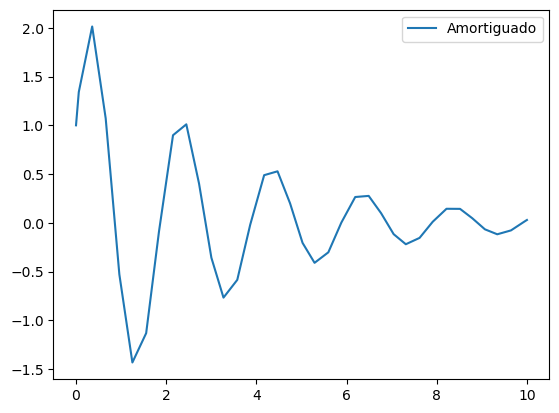

In [12]:
plt.plot(y2.t, y2.y[0], label="Amortiguado")
plt.legend();

Usando un vector de tiempos, a ver si mejora la solución:

In [13]:
t3 = np.arange(0.0, 10.0, 0.01)

y3 = solve_ivp(dy, t_span, y0, args=p, method='RK45', t_eval=t3)

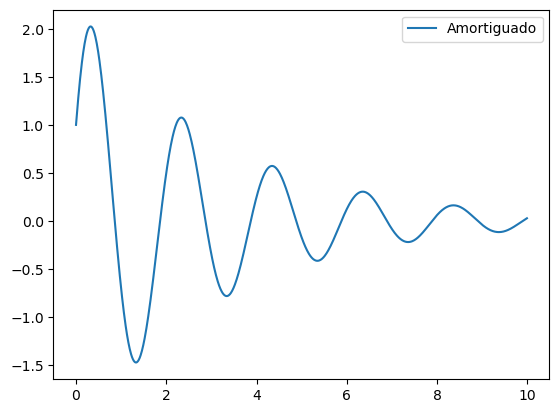

In [14]:
plt.plot(t3, y3.y[0], label="Amortiguado")
plt.legend();